<a href="https://colab.research.google.com/github/yasaswinik12/Decision-tree-model/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing all the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [60]:
# Loading dataset
df = pd.read_csv('heart.csv')

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# shape of the data
df.shape

(303, 14)

In [63]:
# checking if missing values are there in the data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [64]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


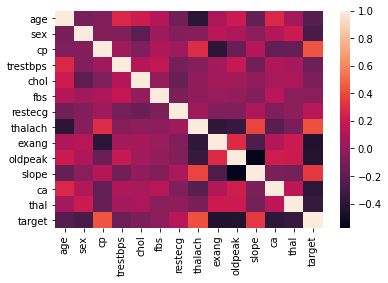

In [65]:
# correlation matrix
sns.heatmap(df.corr())

In [66]:
# separating independent variables and dependent variables 
y = df['target']
X = df.drop(['target'],axis=1)

In [67]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [68]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [69]:
# splitting dataset into training set and validation set
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size = 0.25, random_state = 101,stratify=y)

In [70]:
# distribution of training set
y_train.value_counts(normalize=True)

1    0.546256
0    0.453744
Name: target, dtype: float64

In [71]:
# distribution of validation set
y_valid.value_counts(normalize=True)

1    0.539474
0    0.460526
Name: target, dtype: float64

In [72]:
# shape of training set
X_train.shape, y_train.shape

((227, 13), (227,))

In [73]:
# shape of validation set
X_valid.shape, y_valid.shape

((76, 13), (76,))

# Finding the optimum max_length

In [74]:
#finding the optimum max_depth
train_accuracy=[]
valid_accuracy=[]
for depth in range(1,10):
  model = DecisionTreeClassifier(max_depth=depth,random_state=10)
  model.fit(X_train,y_train)
  train_accuracy.append(model.score(X_train, y_train))
  valid_accuracy.append(model.score(X_valid, y_valid))

In [75]:
f = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':valid_accuracy})
f.head()

,max_depth,train_acc,valid_acc
0,1,0.762115,0.750000
1,2,0.784141,0.723684
2,3,0.854626,0.802632
3,4,0.889868,0.763158
4,5,0.938326,0.763158


No handles with labels found to put in legend.


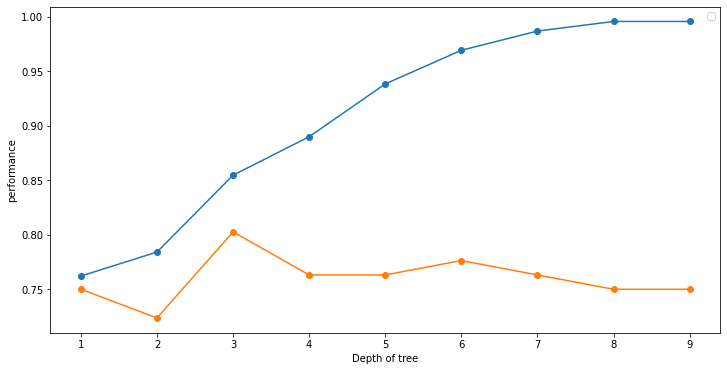

In [76]:
plt.figure(figsize=(12,6))
plt.plot(f['max_depth'], f['train_acc'],marker='o')
plt.plot(f['max_depth'], f['valid_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

# Building the decision tree model

In [77]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=14,random_state=10)

In [78]:
# Train Decision Tree Classifer
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

# Feature importance

In [79]:
# feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
2,cp,0.490
11,ca,0.215
12,thal,0.188
10,slope,0.059
0,age,0.029
1,sex,0.019
3,trestbps,0.000
4,chol,0.000
5,fbs,0.000
6,restecg,0.000


In [80]:
# training score
model.score(X_train,y_train)

0.8546255506607929

In [81]:
# validation score
model.score(X_test,y_test)

0.8026315789473685

In [86]:
y_pred = model.predict(X_test)

In [87]:
# confusion matrix
cc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decission Tree Model: ")
cc

Confusion Matrix for Decission Tree Model: 


array([[25, 10],
       [ 5, 36]])

In [88]:
print("Accuracy for Decision Tree model:",metrics.accuracy_score(y_test, y_pred))

Accuracy for Decision Tree model: 0.8026315789473685


# Visualizing the Decision tree

In [82]:
from sklearn import tree

In [83]:
decision_tree = tree.export_graphviz(model,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [84]:
!dot -Tpng tree.dot -o tree.png

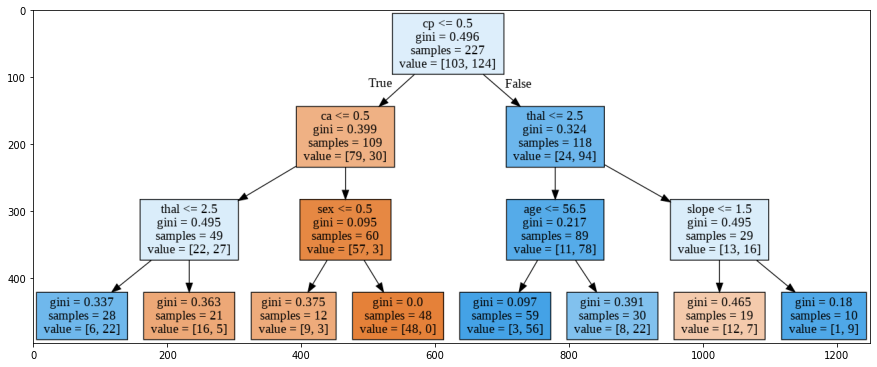

In [85]:
img = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(img)